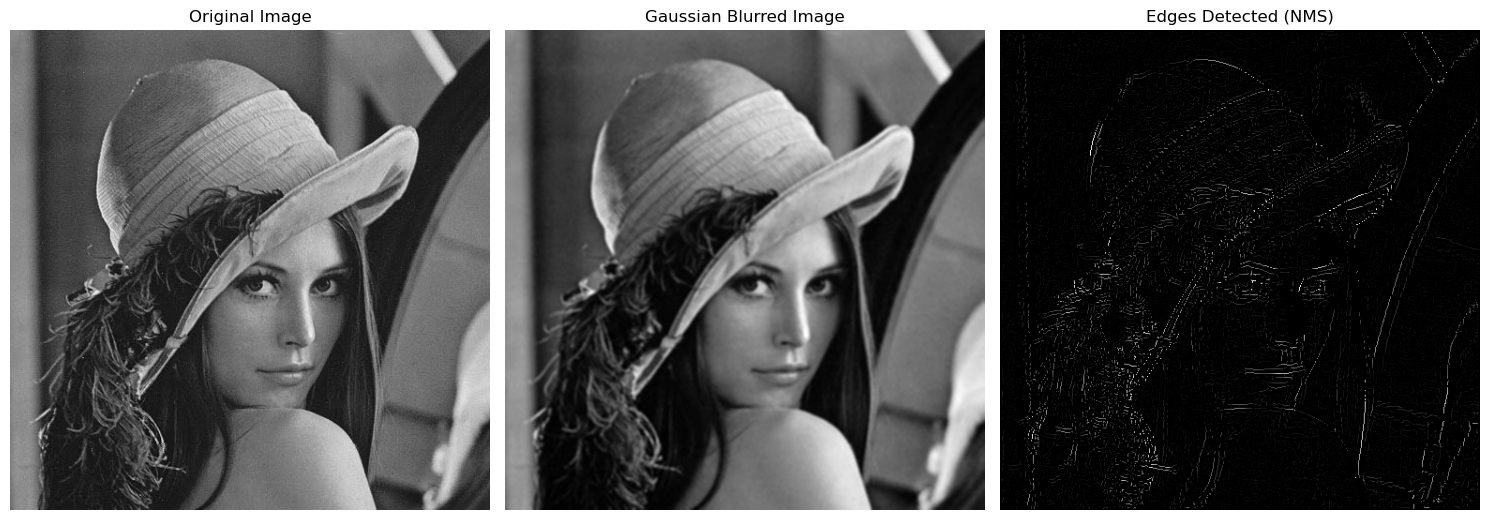

In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Path to the image
image_path = os.path.join(os.getcwd(), 'data', 'images', 'lena_color.jpg')

# Load the image in grayscale
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if image is None:
    print("Error: Image could not be loaded.")
else:
    # Apply Gaussian Blur to smooth the image
    blurred_image = cv2.GaussianBlur(image, (5, 5), sigmaX=1.4)

    # Compute gradients using Sobel filters
    gradient_x = cv2.Sobel(blurred_image, cv2.CV_64F, 1, 0, ksize=3)
    gradient_y = cv2.Sobel(blurred_image, cv2.CV_64F, 0, 1, ksize=3)

    # Compute gradient magnitude and direction
    magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
    direction = np.arctan2(gradient_y, gradient_x)  # In radians

    # Normalize direction to 4 main directions (0, 45, 90, 135 degrees)
    angle = np.rad2deg(direction) % 180
    angle[(angle >= 0) & (angle < 22.5)] = 0
    angle[(angle >= 22.5) & (angle < 67.5)] = 45
    angle[(angle >= 67.5) & (angle < 112.5)] = 90
    angle[(angle >= 112.5) & (angle < 157.5)] = 135

    # Apply Non-Maximum Suppression
    nms = np.zeros_like(magnitude, dtype=np.uint8)
    rows, cols = magnitude.shape
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            # Suppress pixels not along the gradient direction
            if angle[i, j] == 0:  # Horizontal
                if magnitude[i, j] >= magnitude[i, j-1] and magnitude[i, j] >= magnitude[i, j+1]:
                    nms[i, j] = magnitude[i, j]
            elif angle[i, j] == 45:  # Diagonal (\)
                if magnitude[i, j] >= magnitude[i-1, j+1] and magnitude[i, j] >= magnitude[i+1, j-1]:
                    nms[i, j] = magnitude[i, j]
            elif angle[i, j] == 90:  # Vertical
                if magnitude[i, j] >= magnitude[i-1, j] and magnitude[i, j] >= magnitude[i+1, j]:
                    nms[i, j] = magnitude[i, j]
            elif angle[i, j] == 135:  # Diagonal (/)
                if magnitude[i, j] >= magnitude[i-1, j-1] and magnitude[i, j] >= magnitude[i+1, j+1]:
                    nms[i, j] = magnitude[i, j]

    # Plot the results
    plt.figure(figsize=(15, 7))
    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(blurred_image, cmap='gray')
    plt.title("Gaussian Blurred Image")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.imshow(nms, cmap='gray')
    plt.title("Edges Detected (NMS)")
    plt.axis("off")

    plt.tight_layout()
    plt.show()
